In [39]:
import pandas as pd

df = pd.read_csv('/content/Filghts TEC_Valid.csv')

In [40]:
# Crear una nueva columna que combine DepartureStation y ArrivalStation para identificar rutas únicas
df['Route'] = df['DepartureStation'] + "-" + df['ArrivalStation']

Los fligths ids duplicados se deben a que son el mismo avion que realizó varios vuelos el mismo día, pero hace sentido que por eso esten duplicados, porque los duplicados son el mismo día y estan conectados en relacion al departure y arrival station.

In [41]:
# Creamos nuevo df con fechas y horas separadas
import pandas as pd
df2 = df.copy()

# Convertir las columnas 'STD' y 'STA' a datetime
df2['STD'] = pd.to_datetime(df2['STD'])
df2['STA'] = pd.to_datetime(df2['STA'])

# Extraer la fecha y la hora en columnas separadas
df2['STD_Date'] = df2['STD'].dt.date
df2['STD_Time'] = df2['STD'].dt.time
df2['STA_Date'] = df2['STA'].dt.date
df2['STA_Time'] = df2['STA'].dt.time

df2 = df2.drop(['STD', 'STA', "DepartureStation", "ArrivalStation"], axis=1) #"Aeronave", "Bookings"
df2.head()

,Flight_ID,Aeronave,Destination_Type,Origin_Type,Capacity,Passengers,Bookings,Route,STD_Date,STD_Time,STA_Date,STA_Time
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,Ciudad Fronteriza,Ciudad Principal,240,229.0,157.0,AT-AZ,2023-10-19,11:40:00,2023-10-19,14:25:00
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,MX Amigos y Familia,Ciudad Fronteriza,186,197.0,109.0,BM-AV,2023-07-03,00:55:00,2023-07-03,04:55:00
2,6cfa1bbaa44f08fc7d3061f034a6a5ce,XA-VBV,MX Amigos y Familia,Ciudad Principal,220,NaN,NaN,AW-AS,2024-02-16,17:10:00,2024-02-16,17:55:00
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,MX Amigos y Familia,Ciudad Principal,220,200.0,142.0,AW-AS,2023-06-26,15:15:00,2023-06-26,15:55:00
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,Playa,Ciudad Principal,186,162.0,90.0,BA-AB,2023-02-10,08:40:00,2023-02-10,09:50:00


Si hay datos que pudieran generar ruido y representan menos del 3% de la base de datos, mejor eliminarlos.

Una reserva puede contener varios boletos de avion. (familias por ejemplo)

Specials son descuentos, pero lo importante es la cantidad de productos, podemos excluir todos los combos y especiales, solo agarrar productos tangibles.

Los perecederos son los sandwiches que tienen, duran 1 día en vuelo. se pueden subir hasta 24 perecederos por vuelo (en dos hieleras)

Exluir los transportadores.

En vuelos de 60 minutos pasa 1 vez, en vuelos largos de mas de 2 horas pasan 2 veces.

Hay casos donde los pasajeros sobrepasan la capacidad, eso significa que se sobrevendieron boletos, y debemos ajustar el numero de pasajeros a la capacidad máxima de ese vuelo.

Si no hay matricula de vuelo, se canceló el vuelo.

2023 es el dataframe de entrenamiento, 2024 es el de prueba, el que vamos a predecir (por eso hay tantos nulos)





* Eliminar los registros con passengers nulos
*   Corregir sobrecapacidad passengers.
*   Borrar STA datos porque no nos sirve
* Categorizar las variables que tengan letras




In [42]:
df2.isnull().sum()

Flight_ID                0
Aeronave             80390
Destination_Type         1
Origin_Type              1
Capacity                 0
Passengers          123525
Bookings            123525
Route                    2
STD_Date                 0
STD_Time                 0
STA_Date                 0
STA_Time                 0
dtype: int64

In [43]:
df3 = df2.dropna(subset=['Passengers'])
df3 = df3.dropna(subset=['Aeronave'])
df3 = df3.dropna()
df3.isnull().sum()

Flight_ID           0
Aeronave            0
Destination_Type    0
Origin_Type         0
Capacity            0
Passengers          0
Bookings            0
Route               0
STD_Date            0
STD_Time            0
STA_Date            0
STA_Time            0
dtype: int64

In [44]:
#Corregir sobreventa de boletos de avion
df3['Passengers'] = df3.apply(lambda x: min(x['Passengers'], x['Capacity']) if pd.notna(x['Passengers']) else x['Passengers'], axis=1)
df3

,Flight_ID,Aeronave,Destination_Type,Origin_Type,Capacity,Passengers,Bookings,Route,STD_Date,STD_Time,STA_Date,STA_Time
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,Ciudad Fronteriza,Ciudad Principal,240,229.0,157.0,AT-AZ,2023-10-19,11:40:00,2023-10-19,14:25:00
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,MX Amigos y Familia,Ciudad Fronteriza,186,186.0,109.0,BM-AV,2023-07-03,00:55:00,2023-07-03,04:55:00
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,MX Amigos y Familia,Ciudad Principal,220,200.0,142.0,AW-AS,2023-06-26,15:15:00,2023-06-26,15:55:00
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,Playa,Ciudad Principal,186,162.0,90.0,BA-AB,2023-02-10,08:40:00,2023-02-10,09:50:00
5,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,Playa,MX Amigos y Familia,240,183.0,125.0,AJ-AR,2023-09-07,17:10:00,2023-09-07,18:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
245718,d9ef769565064b1ff1ad90d6d18f69cb,XA-VYF,Playa,Ciudad Principal,180,166.0,89.0,AO-BT,2023-12-26,06:20:00,2023-12-26,10:10:00
245745,598035669a4f0fa2ce1207977932df9e,XA-VAI,Playa,Ciudad Principal,180,142.0,54.0,AW-BT,2023-12-28,10:25:00,2023-12-28,13:50:00
245747,90d2cab80b7700b5d854ae393678144b,XA-VYA,Playa,Ciudad Principal,180,156.0,61.0,BA-BT,2023-12-23,11:45:00,2023-12-23,15:00:00
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,Playa,Ciudad Fronteriza,240,189.0,86.0,BM-BT,2023-12-29,07:30:00,2023-12-29,14:50:00


## Categorizar Variables

In [45]:
df4 = df3.copy()

In [46]:
#Categorizar Las variables
#Destination time y Origin

destination_type_mapping = {dtype: i for i, dtype in enumerate(df4['Destination_Type'].unique(), start=1)}
aeronave__mapping = {dtype: i for i, dtype in enumerate(df4['Aeronave'].unique(), start=1)}
origin_type_mapping = {dtype: i for i, dtype in enumerate(df4['Origin_Type'].unique(), start=1)}
route_mapping = {dtype: i for i, dtype in enumerate(df4['Route'].unique(), start=1)}

# Aplicar este mapeo a la columna 'Destination_Type'
df4['Destination_Type'] = df4['Destination_Type'].map(destination_type_mapping)
df4['Aeronave'] = df4['Aeronave'].map(aeronave__mapping)
df4['Origin_Type'] = df4['Origin_Type'].map(origin_type_mapping)
df4['Route'] = df4['Route'].map(route_mapping)


## Ahora vamos a discretizar los datos de fecha y hora
Para fecha vamos a dividirlo en los 12 meses, y para hora haremos 6 bloques de horas, si el STD esta dentro de algun rango otorgará el valor de ese bloque de 4 horas

In [47]:
df5 = df4.copy()

In [48]:
# Convertir columnas de fecha y hora si es necesario
df5['STD_Date'] = pd.to_datetime(df5['STD_Date'])
df5['STA_Date'] = pd.to_datetime(df5['STA_Date'])
df5['STD_Time'] = pd.to_datetime(df5['STD_Time'], format='%H:%M:%S').dt.time
df5['STA_Time'] = pd.to_datetime(df5['STA_Time'], format='%H:%M:%S').dt.time

# Extraer el mes para las fechas
df5['STD_Month'] = df5['STD_Date'].dt.month
df5['STA_Month'] = df5['STA_Date'].dt.month

# Función para asignar bloques de horas en intervalos de 1 hora
def assign_time_block(time):
    hour = time.hour
    if hour < 1:
        return 1
    elif hour < 2:
        return 2
    elif hour < 3:
        return 3
    elif hour < 4:
        return 4
    elif hour < 5:
        return 5
    elif hour < 6:
        return 6
    elif hour < 7:
        return 7
    elif hour < 8:
        return 8
    elif hour < 9:
        return 9
    elif hour < 10:
        return 10
    elif hour < 11:
        return 11
    elif hour < 12:
        return 12
    elif hour < 13:
        return 13
    elif hour < 14:
        return 14
    elif hour < 15:
        return 15
    elif hour < 16:
        return 16
    elif hour < 17:
        return 17
    elif hour < 18:
        return 18
    elif hour < 19:
        return 19
    elif hour < 20:
        return 20
    elif hour < 21:
        return 21
    elif hour < 22:
        return 22
    elif hour < 23:
        return 23
    else:
        return 24


# Aplicar la función de bloques de horas
df5['STD_Block'] = df5['STD_Time'].apply(assign_time_block)
df5['STA_Block'] = df5['STA_Time'].apply(assign_time_block)
df5

,Flight_ID,Aeronave,Destination_Type,Origin_Type,Capacity,Passengers,Bookings,Route,STD_Date,STD_Time,STA_Date,STA_Time,STD_Month,STA_Month,STD_Block,STA_Block
0,ab954014077430bd842cfa305a55c0f8,1,1,1,240,229.0,157.0,1,2023-10-19,11:40:00,2023-10-19,14:25:00,10,10,12,15
1,efd86c996035dacdca7a0ccb2560dda1,2,2,2,186,186.0,109.0,2,2023-07-03,00:55:00,2023-07-03,04:55:00,7,7,1,5
3,dd0fad3248951d2f71d63e6279aeaa4b,3,2,1,220,200.0,142.0,3,2023-06-26,15:15:00,2023-06-26,15:55:00,6,6,16,16
4,d0987ee648eea254063bfe2b39571b67,4,3,1,186,162.0,90.0,4,2023-02-10,08:40:00,2023-02-10,09:50:00,2,2,9,10
5,3b5df8805161ea827d2f2e4298c38e06,1,3,3,240,183.0,125.0,5,2023-09-07,17:10:00,2023-09-07,18:05:00,9,9,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245718,d9ef769565064b1ff1ad90d6d18f69cb,58,3,1,180,166.0,89.0,282,2023-12-26,06:20:00,2023-12-26,10:10:00,12,12,7,11
245745,598035669a4f0fa2ce1207977932df9e,23,3,1,180,142.0,54.0,280,2023-12-28,10:25:00,2023-12-28,13:50:00,12,12,11,14
245747,90d2cab80b7700b5d854ae393678144b,60,3,1,180,156.0,61.0,279,2023-12-23,11:45:00,2023-12-23,15:00:00,12,12,12,16
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,7,3,2,240,189.0,86.0,283,2023-12-29,07:30:00,2023-12-29,14:50:00,12,12,8,15


In [49]:
df7 = df5.drop(['STD_Date', 'STD_Time', "STA_Date", "STA_Time"], axis=1)
df7

,Flight_ID,Aeronave,Destination_Type,Origin_Type,Capacity,Passengers,Bookings,Route,STD_Month,STA_Month,STD_Block,STA_Block
0,ab954014077430bd842cfa305a55c0f8,1,1,1,240,229.0,157.0,1,10,10,12,15
1,efd86c996035dacdca7a0ccb2560dda1,2,2,2,186,186.0,109.0,2,7,7,1,5
3,dd0fad3248951d2f71d63e6279aeaa4b,3,2,1,220,200.0,142.0,3,6,6,16,16
4,d0987ee648eea254063bfe2b39571b67,4,3,1,186,162.0,90.0,4,2,2,9,10
5,3b5df8805161ea827d2f2e4298c38e06,1,3,3,240,183.0,125.0,5,9,9,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...
245718,d9ef769565064b1ff1ad90d6d18f69cb,58,3,1,180,166.0,89.0,282,12,12,7,11
245745,598035669a4f0fa2ce1207977932df9e,23,3,1,180,142.0,54.0,280,12,12,11,14
245747,90d2cab80b7700b5d854ae393678144b,60,3,1,180,156.0,61.0,279,12,12,12,16
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,7,3,2,240,189.0,86.0,283,12,12,8,15


In [50]:
df7.to_csv('datos_24.csv', index=False)

# Modelo de Random Forest con Mejores Parámetros

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Preparar los datos
X = df7.drop(['Flight_ID', 'Passengers', "STA_Month", "STA_Block", "Aeronave", "Bookings"], axis=1)
y = df7['Passengers']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
forest_model = RandomForestRegressor(max_depth= 20, min_samples_leaf= 1, min_samples_split= 10, n_estimators=200, random_state=42)
forest_model.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = forest_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, R^2: {r2}")

MSE: 528.0374457904535, R^2: 0.6005157513202193


In [52]:
def predict_passengers(destination_type, origin_type, capacity, route, std_month, std_block): #bookings
    # Crear un DataFrame con los valores de entrada para hacer la predicción
    input_data = pd.DataFrame({
        'Destination_Type': [destination_type],
        'Origin_Type': [origin_type],
        'Capacity': [capacity],
        #'Bookings': [bookings],
        'Route': [route],
        'STD_Month': [std_month],
        'STD_Block': [std_block]
    })

    # Hacer la predicción usando el modelo entrenado
    predicted_passengers = forest_model.predict(input_data)
    return predicted_passengers[0]

In [ ]:
#Flight_ID	                              Aeronave	  Destination_Type Origin_Type	    Capacity	Passengers	Bookings	 Route	STD_Month	STA_Month	STD_Block	STA_Block
#ab954014077430bd842cfa305a55c0f8	            1	           1	              1	             240	     229.0	    157.0	     1	     10	       10	   12         	15
#efd86c996035dacdca7a0ccb2560dda1	            2	           2	              2	             186	     186.0	    109.0	     2	      7	        7.  	1	         5

In [53]:
predicción = predict_passengers(1, 1, 240, 1, 10, 12)
print("Predicción de pasajeros:", predicción) #229 es lo correcto

Predicción de pasajeros: 232.38585184098986


In [55]:
predicción = predict_passengers(2, 2, 186, 2, 7, 1)
print("Predicción de pasajeros:", predicción) #186 es lo correcto

Predicción de pasajeros: 169.58946326456606


In [56]:
# Crear un DataFrame para comparar los valores reales y los predichos
comparison_df = pd.DataFrame({
    'Y Real': y_test,
    'Y Predicha': y_pred
})

# Resetear el índice para alinear los datos correctamente
comparison_df.reset_index(drop=True, inplace=True)
comparison_df

,Y Real,Y Predicha
0,147.0,154.183519
1,202.0,211.681578
2,240.0,233.599905
3,163.0,166.970198
4,122.0,137.014052
...,...,...
24340,212.0,197.891760
24341,182.0,180.017002
24342,213.0,209.921415
24343,208.0,233.279376


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


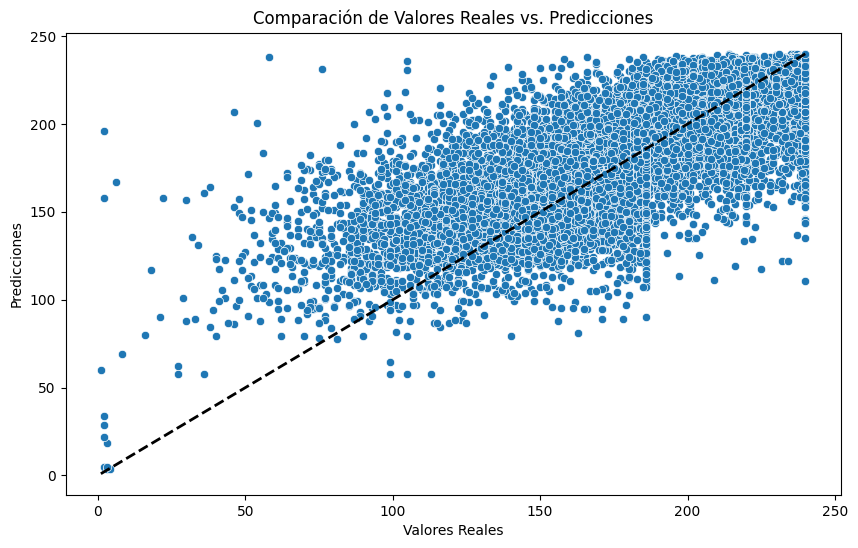

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de identidad
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.show()
